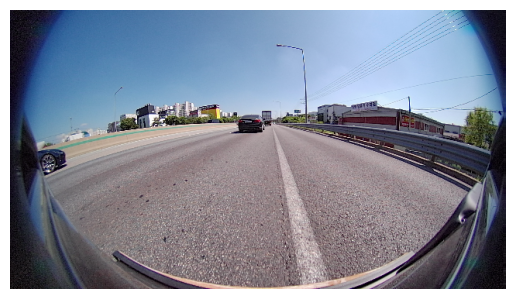

In [13]:
import os
import numpy as np
import argparse

import torch
from torch.utils.data import DataLoader

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2

from Data_loader import CustomDataset
import matplotlib.pyplot as plt



data_root = 'D:\\samsung_segmentation\\open'

h, w = 360, 640
transform = A.Compose([A.Resize(h, w),
                       ToTensorV2()])

# data loader for training
dataset = CustomDataset(csv_file=os.path.join(data_root, 'train_target.csv'), data_root = data_root, transform=transform, infer=True)
dataloader = iter(DataLoader(dataset, batch_size=1, shuffle=False))

distorted = next(dataloader)
distorted = np.transpose(distorted.cpu().detach().numpy()[0],  (1,2, 0))
plt.figure(1)
plt.imshow(distorted)
plt.axis('off')
plt.show()


In [16]:
coor_h = np.linspace(0, h-1, h)
coor_w = np.linspace(0, w-1, w)

hc = h//2
wc = w//2

[grid_h, grid_w] = np.meshgrid(coor_h, coor_w)
r = np.sqrt(grid_h**2 + grid_w**2)

k0=1
k1=0.2
k2=0.2

L = k0 + k1*r + k2*(r**2)

grid_h_cor = L*grid_h
grid_w_cor = L*grid_w
print(grid_h)
print(grid_h_cor)

[[-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]
 [-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]
 [-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]
 ...
 [-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]
 [-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]
 [-1.         -0.99442897 -0.98885794 ...  0.98885794  0.99442897
   1.        ]]
[[-1.68284271 -1.67047534 -1.65815596 ...  1.65815596  1.67047534
   1.68284271]
 [-1.68115043 -1.66879126 -1.65648008 ...  1.65648008  1.66879126
   1.68115043]
 [-1.67946276 -1.66711176 -1.65480877 ...  1.65480877  1.66711176
   1.67946276]
 ...
 [-1.67946276 -1.66711176 -1.65480877 ...  1.65480877  1.66711176
   1.67946276]
 [-1.68115043 -1.66879126 -1.65648008 ...  1.65648008  1.66879126
   1.68115043]
 [-1.68284271 -1.67047534 -1.65815596 ...  1.65815596  1.67047534
   1.68284271]]


In [18]:
np.linspace(0, 9, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])